Problem 2:


*How many Unique patterns that exist in the historical stock data set, based on fluctuations in price*

WE can use k means clustering for cluster out the different patterns that exist in the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
stock  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Clustering/data_stocks.csv')

In [ ]:
stock.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [ ]:
stock['DATE'] = pd.to_datetime(stock['DATE'])

In [ ]:
data = stock.set_index('DATE')

In [ ]:
data.head()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:01.491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1970-01-01 00:00:01.491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
1970-01-01 00:00:01.491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
1970-01-01 00:00:01.491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
1970-01-01 00:00:01.491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


normalizing the dataset 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(data.values)

In [ ]:
normalized_data = pd.DataFrame(scaler.transform(data.values),columns = data.columns,index = data.index)

In [ ]:
normalized_data.head()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:01.491226200,0.213425,0.109930,0.144559,0.051310,0.462916,0.245560,0.061208,0.843663,0.541984,0.147541,...,0.041803,0.859284,0.055655,0.093943,0.788639,0.026646,0.105184,0.048780,0.509216,0.090988
1970-01-01 00:00:01.491226260,0.216458,0.112129,0.145380,0.076781,0.465473,0.242085,0.073063,0.848130,0.541126,0.149470,...,0.041803,0.859284,0.003591,0.093943,0.788639,0.027408,0.105184,0.040172,0.499357,0.090988
1970-01-01 00:00:01.491226320,0.207665,0.108465,0.144973,0.073274,0.462276,0.244884,0.069203,0.845617,0.550777,0.139826,...,0.051165,0.865832,0.000000,0.106304,0.787318,0.026646,0.097671,0.040890,0.496357,0.092288
1970-01-01 00:00:01.491226380,0.217759,0.112862,0.142916,0.067660,0.460358,0.242085,0.068575,0.835846,0.540268,0.133076,...,0.045722,0.865832,0.028725,0.107540,0.787318,0.026266,0.100676,0.050215,0.496357,0.093588
1970-01-01 00:00:01.491226440,0.221102,0.125159,0.143737,0.060539,0.462596,0.238996,0.074444,0.835846,0.543700,0.141755,...,0.046157,0.876019,0.003591,0.103832,0.788639,0.026646,0.103681,0.052367,0.496142,0.081456


K-Means clustering is based on euclidean distance implementation which is valid for the numerical values but not for the time series index values ,I am using DTW algorithm in order to solve this problem .

For the values of K in K-means i am using elbow method

In [ ]:
!pip install dtaidistance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tslearn
from tslearn.clustering import TimeSeriesKMeans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt

# create an instance of TimeSeriesKMeans
ts_kmeans = TimeSeriesKMeans(n_clusters=10, max_iter=5, n_init=10)

# fit the model to the time series data
ts_kmeans.fit(normalized_data)

# create a list of values for the n_clusters parameter
n_clusters_range = list(range(1, 11))

print('done with cluster. ')
# compute the sum of squared distances for each value of n_clusters
inertias = []
for n_clusters in n_clusters_range:
    print(f'____________{n_clusters}___________')
    ts_kmeans.n_clusters = n_clusters
    ts_kmeans.fit(normalized_data)
    inertias.append(ts_kmeans.inertia_)

done with cluster. 
____________1___________
____________2___________
____________3___________
____________4___________
____________5___________
____________6___________
____________7___________
____________8___________
____________9___________
____________10___________


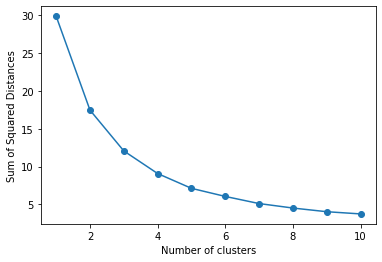

In [ ]:
# plot the sum of squared distances for each value of n_clusters
plt.plot(n_clusters_range, inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()

Choosing k values as k = 6

In [ ]:
ts_kmeans = TimeSeriesKMeans(n_clusters=6, max_iter=5, n_init=10)

TimeSeriesKMeans(max_iter=5, n_clusters=6, n_init=10)

In [ ]:
ts_kmeans.fit(normalized_data.T)

TimeSeriesKMeans(max_iter=5, n_clusters=6, n_init=10)

In [ ]:
y_predict = ts_kmeans.predict(normalized_data.T)

/usr/local/lib/python3.8/dist-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 501 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


In [ ]:
data = normalized_data.T

In [ ]:
data['predicted_values'] = y_predict

In [ ]:
data.head()

DATE,1970-01-01 00:00:01.491226200,1970-01-01 00:00:01.491226260,1970-01-01 00:00:01.491226320,1970-01-01 00:00:01.491226380,1970-01-01 00:00:01.491226440,1970-01-01 00:00:01.491226500,1970-01-01 00:00:01.491226560,1970-01-01 00:00:01.491226620,1970-01-01 00:00:01.491226680,1970-01-01 00:00:01.491226740,...,1970-01-01 00:00:01.504209120,1970-01-01 00:00:01.504209180,1970-01-01 00:00:01.504209240,1970-01-01 00:00:01.504209300,1970-01-01 00:00:01.504209360,1970-01-01 00:00:01.504209420,1970-01-01 00:00:01.504209480,1970-01-01 00:00:01.504209540,1970-01-01 00:00:01.504209600,predicted_values
SP500,0.213425,0.216458,0.207665,0.217759,0.221102,0.225870,0.223269,0.223826,0.217821,0.219801,...,0.889295,0.890100,0.888490,0.884652,0.885890,0.883104,0.872331,0.881370,0.881370,1
NASDAQ.AAL,0.109930,0.112129,0.108465,0.112862,0.125159,0.125313,0.120191,0.120191,0.114328,0.109930,...,0.285819,0.288018,0.287285,0.284353,0.285086,0.285819,0.286552,0.284353,0.286552,3
NASDAQ.AAPL,0.144559,0.145380,0.144973,0.142916,0.143737,0.148665,0.152115,0.149897,0.150103,0.149487,...,0.981520,0.986858,0.987269,0.984805,0.983573,0.983984,0.979466,0.974127,0.978234,5
NASDAQ.ADBE,0.051310,0.076781,0.073274,0.067660,0.060539,0.067553,0.071613,0.070137,0.068660,0.072721,...,0.988188,0.992248,0.991141,0.989295,0.991141,0.993725,0.990218,0.986342,0.993725,1
NASDAQ.ADI,0.462916,0.465473,0.462276,0.460358,0.462596,0.462916,0.468031,0.472506,0.475064,0.470908,...,0.569054,0.564578,0.568414,0.566496,0.567136,0.565857,0.563939,0.561381,0.568414,5


In [ ]:
index_ = data.index

In [ ]:
predict_dict = {index_[i]: y_predict[i] for i in range(len(index_))}

In [ ]:
# grouping the stocks using the values
grouped_dict = {}

for key, value in predict_dict.items():
    if value not in grouped_dict:
        grouped_dict[value] = [key]
    else:
        if 'NASDAQ' in key:
          grouped_dict[value].append(key)

In [ ]:
grouped_dict

{1: ['SP500',
  'NASDAQ.ADBE',
  'NASDAQ.ADSK',
  'NASDAQ.ATVI',
  'NASDAQ.AVGO',
  'NASDAQ.CMCSA',
  'NASDAQ.CME',
  'NASDAQ.CTSH',
  'NASDAQ.EA',
  'NASDAQ.EQIX',
  'NASDAQ.FLIR',
  'NASDAQ.INTU',
  'NASDAQ.ISRG',
  'NASDAQ.LKQ',
  'NASDAQ.LRCX',
  'NASDAQ.MCHP',
  'NASDAQ.MNST',
  'NASDAQ.MSFT',
  'NASDAQ.NVDA',
  'NASDAQ.NWSA',
  'NASDAQ.PYPL',
  'NASDAQ.WFM',
  'NASDAQ.WLTW',
  'NASDAQ.WYNN'],
 3: ['NASDAQ.AAL',
  'NASDAQ.AMAT',
  'NASDAQ.AMZN',
  'NASDAQ.CA',
  'NASDAQ.CERN',
  'NASDAQ.CSX',
  'NASDAQ.EBAY',
  'NASDAQ.EXPE',
  'NASDAQ.FISV',
  'NASDAQ.GOOG',
  'NASDAQ.GOOGL',
  'NASDAQ.GRMN',
  'NASDAQ.HAS',
  'NASDAQ.HSIC',
  'NASDAQ.MAR',
  'NASDAQ.MU',
  'NASDAQ.NTRS',
  'NASDAQ.NWS',
  'NASDAQ.PCLN',
  'NASDAQ.REGN',
  'NASDAQ.SWKS',
  'NASDAQ.WDC',
  'NASDAQ.XLNX'],
 5: ['NASDAQ.AAPL',
  'NASDAQ.ADI',
  'NASDAQ.ADP',
  'NASDAQ.BIIB',
  'NASDAQ.CBOE',
  'NASDAQ.CHTR',
  'NASDAQ.CINF',
  'NASDAQ.CTAS',
  'NASDAQ.ETFC',
  'NASDAQ.FB',
  'NASDAQ.FITB',
  'NASDAQ.GILD',
  'NASDAQ

In [ ]:
_file = open('/content/drive/MyDrive/Colab Notebooks/Clustering/cluster_group.txt', 'wt')
_file.write(str(grouped_dict))
_file.close()

In [ ]:
# Extract the keys and values from the dictionary
keys = list(grouped_dict.keys())
values = [len(val) for val in grouped_dict.values()]

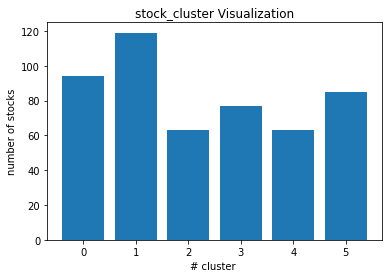

In [ ]:
# Create a bar chart
plt.bar(keys, values)

# Add labels and title
plt.xlabel('# cluster ')
plt.ylabel('number of stocks')
plt.title('stock_cluster Visualization')

plt.savefig('/content/drive/MyDrive/Colab Notebooks/Clustering/stock_cluster.png')

Conclusion : we have 5 different unique patterns that exist in out dataframe out of them cluster 1 has the maximum number of stock availble with similar patterns. 

In [ ]:
normalized_data

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:01.491226200,0.213425,0.109930,0.144559,0.051310,0.462916,0.245560,0.061208,0.843663,0.541984,0.147541,...,0.041803,0.859284,0.055655,0.093943,0.788639,0.026646,0.105184,0.048780,0.509216,0.090988
1970-01-01 00:00:01.491226260,0.216458,0.112129,0.145380,0.076781,0.465473,0.242085,0.073063,0.848130,0.541126,0.149470,...,0.041803,0.859284,0.003591,0.093943,0.788639,0.027408,0.105184,0.040172,0.499357,0.090988
1970-01-01 00:00:01.491226320,0.207665,0.108465,0.144973,0.073274,0.462276,0.244884,0.069203,0.845617,0.550777,0.139826,...,0.051165,0.865832,0.000000,0.106304,0.787318,0.026646,0.097671,0.040890,0.496357,0.092288
1970-01-01 00:00:01.491226380,0.217759,0.112862,0.142916,0.067660,0.460358,0.242085,0.068575,0.835846,0.540268,0.133076,...,0.045722,0.865832,0.028725,0.107540,0.787318,0.026266,0.100676,0.050215,0.496357,0.093588
1970-01-01 00:00:01.491226440,0.221102,0.125159,0.143737,0.060539,0.462596,0.238996,0.074444,0.835846,0.543700,0.141755,...,0.046157,0.876019,0.003591,0.103832,0.788639,0.026646,0.103681,0.052367,0.496142,0.081456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:01.504209360,0.885890,0.285086,0.983573,0.991141,0.567136,0.412934,0.868211,0.139587,0.990349,0.739634,...,0.708252,0.291618,0.968582,0.226823,0.039630,0.975447,0.998497,0.982783,0.179597,0.903380
1970-01-01 00:00:01.504209420,0.883104,0.285819,0.983984,0.993725,0.565857,0.413900,0.869038,0.139587,0.990885,0.739634,...,0.710647,0.294529,0.967684,0.227441,0.040951,0.975828,0.997746,0.984218,0.180454,0.902080
1970-01-01 00:00:01.504209480,0.872331,0.286552,0.979466,0.990218,0.563939,0.411197,0.867659,0.139587,0.988311,0.740116,...,0.710864,0.294820,0.970377,0.224969,0.033686,0.975638,0.996995,0.982783,0.179597,0.899913


# visualizing based on the grouped dicionary for 5 plots of each values 

In [ ]:
import itertools
values = [value[:5] for value in grouped_dict.values()]
values = list(itertools.chain(*values))


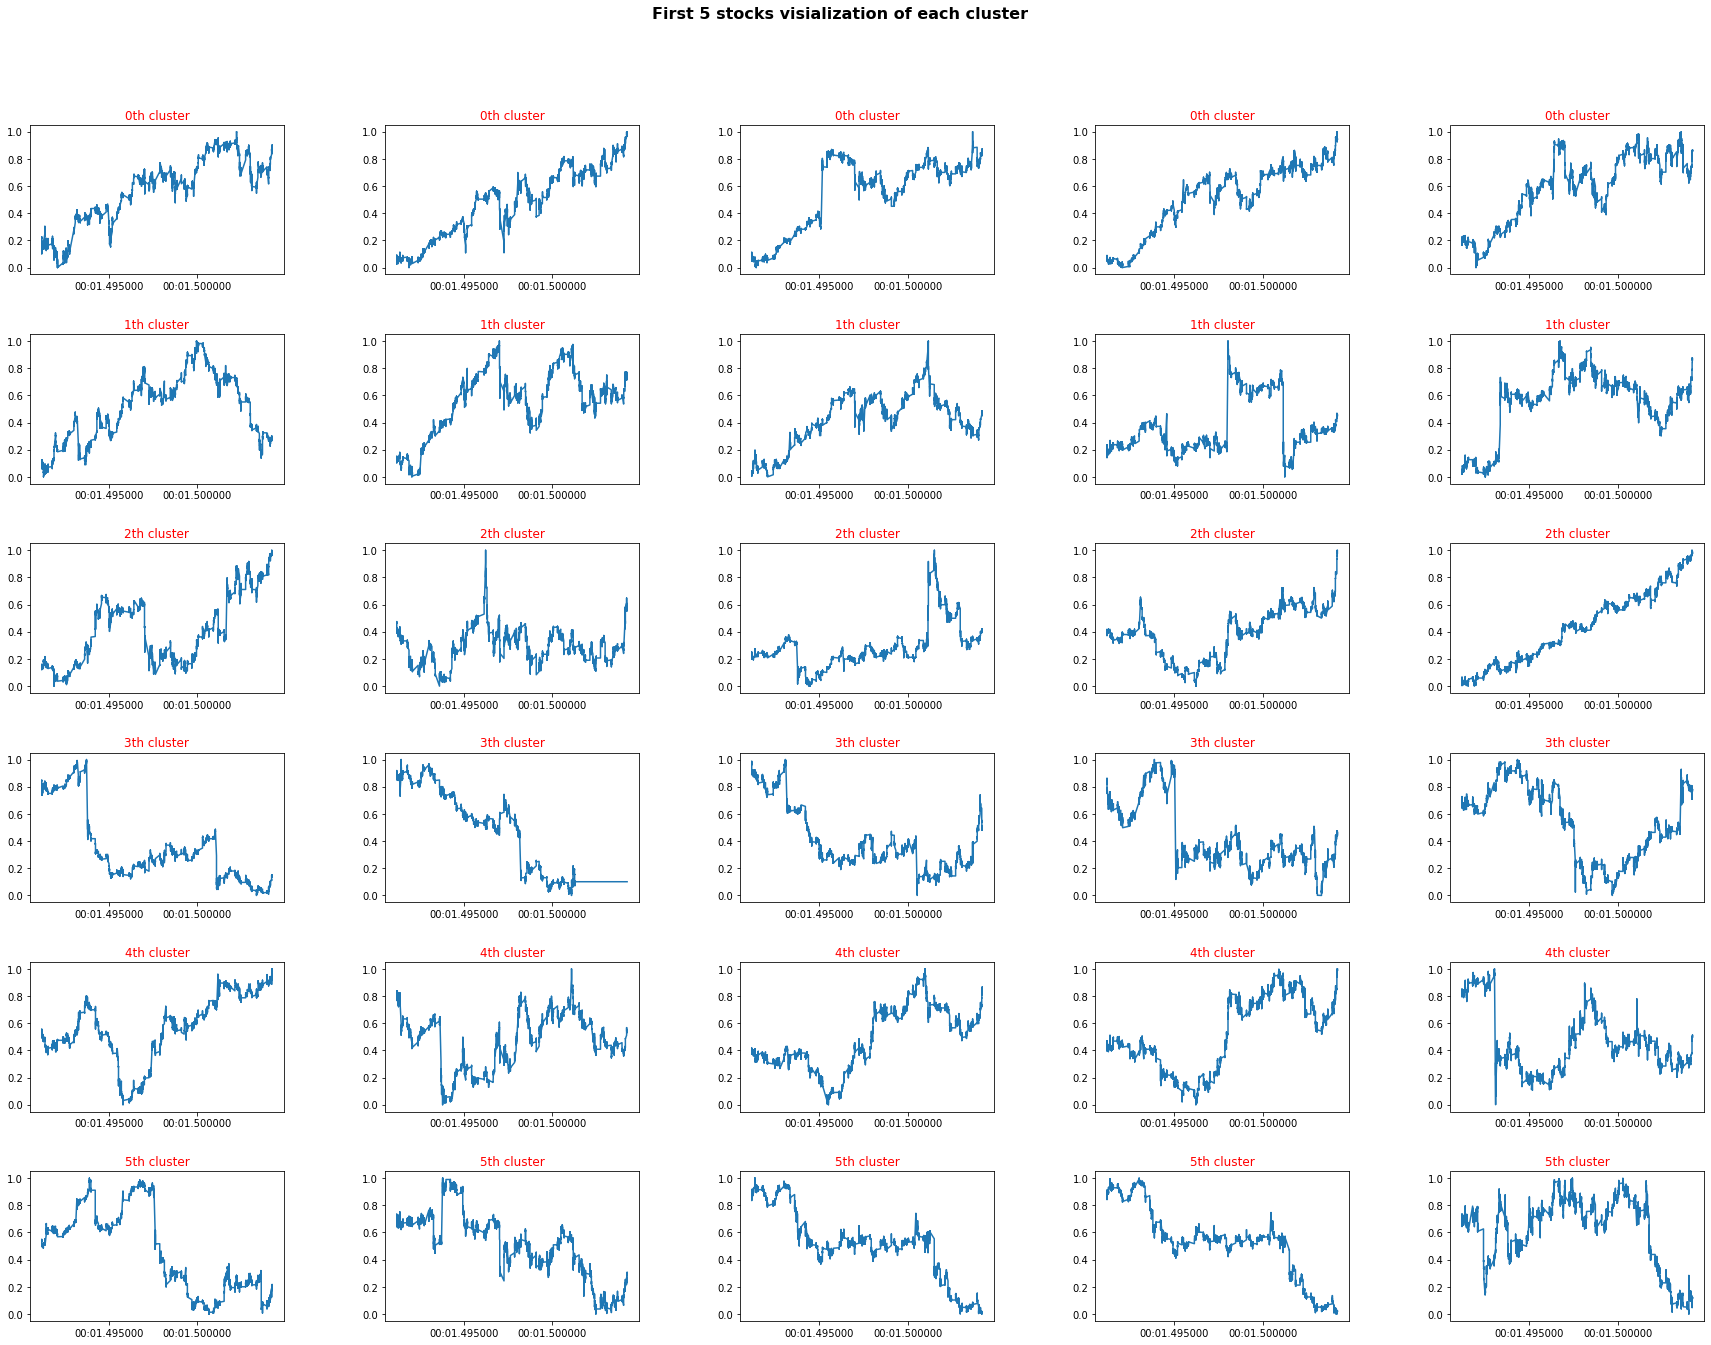

In [ ]:
fig, axes = plt.subplots(6 ,5, figsize=(30, 22))
axes = axes.flatten()
for i,value in enumerate(values):
  if i%5 <= 5:
    axes[i].set_title(f'{i//5}th cluster',color = 'red')
  axes[i].plot(normalized_data[value])
plt.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle('First 5 stocks visialization of each cluster',
    fontsize=16,
    fontweight="bold",
    x=0.5,
    y=0.95,
    ha="center",
    va="center")
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Clustering/stock_cluster_first5.png')




<Figure size 432x288 with 0 Axes>